In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
# datanın okunması 
data = pd.read_csv('UniqueDataSet/teutancitypowerconsumption.csv')

Veri setinin şekli (52416, 9)
veri seti değişken tipleri: DateTime                      object
Temperature                  float64
Humidity                     float64
Wind Speed                   float64
general diffuse flows        float64
diffuse flows                float64
Zone 1 Power Consumption     float64
Zone 2  Power Consumption    float64
Zone 3  Power Consumption    float64
dtype: object
veri setinin ilk 10 satırı
        DateTime  Temperature  Humidity  Wind Speed  general diffuse flows  \
0  1/1/2017 0:00        6.559      73.8       0.083                  0.051   
1  1/1/2017 0:10        6.414      74.5       0.083                  0.070   
2  1/1/2017 0:20        6.313      74.5       0.080                  0.062   
3  1/1/2017 0:30        6.121      75.0       0.083                  0.091   
4  1/1/2017 0:40        5.921      75.7       0.081                  0.048   
5  1/1/2017 0:50        5.853      76.9       0.081                  0.059   
6  1/1/2017 1:00      

<AxesSubplot:>

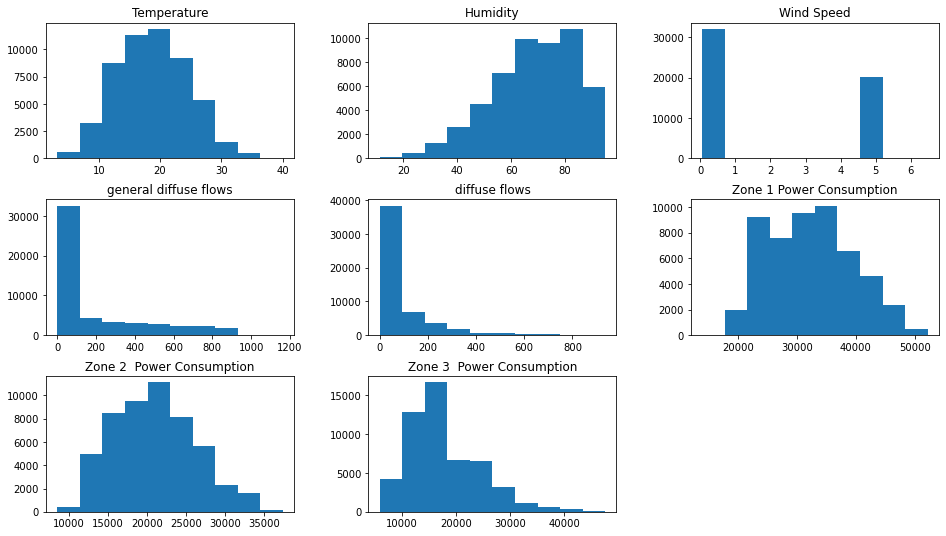

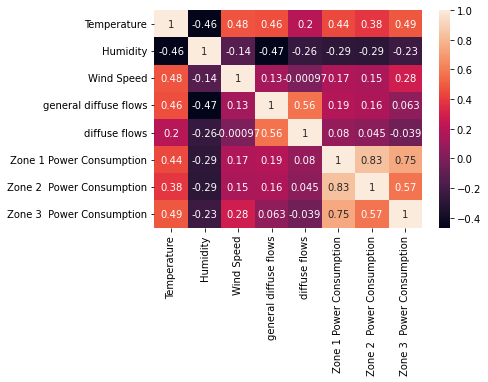

In [3]:
# veri setinin tanıtılması
print("Veri setinin şekli",data.shape)
print("veri seti değişken tipleri:",data.dtypes)
print("veri setinin ilk 10 satırı")
print(data.head(10))
print("veri setinin istatistiki verileri")
description=data.describe()
print(description)
# veri seti içindeki değişkenlerin dağılımlarının çizdirilmesi
data.hist(bins=10,figsize=(16,9),grid=False);
corr = data.corr(method='pearson')
plt.figure()
sns.heatmap(corr, annot=True)

In [5]:
# sıcaklık değerinin ayrılması
temperature = data.iloc[:,1:2]

In [6]:
# p value kullanarak backward elimination yapılması
import statsmodels.api as sm
X = np.append(arr= np.ones((52416,1)).astype(int), values = data, axis = 1)
X_l = data.iloc[:,[2,3,4,5,6,7,8]].values
X_l = np.array(X_l, dtype=float)
model = sm.OLS(temperature,X_l).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            Temperature   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                          1.490e+05
Date:                Wed, 13 Apr 2022   Prob (F-statistic):                        0.00
Time:                        18:08:01   Log-Likelihood:                     -1.5091e+05
No. Observations:               52416   AIC:                                  3.018e+05
Df Residuals:                   52409   BIC:                                  3.019e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [7]:
# x4 ü denklemden çıkarıp tekrar sorgu yapılması
X = np.append(arr= np.ones((52416,1)).astype(int), values = data, axis = 1)
X_l = data.iloc[:,[2,3,4,6,7,8]].values
X_l = np.array(X_l, dtype=float)
model = sm.OLS(temperature,X_l).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            Temperature   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                          1.738e+05
Date:                Wed, 13 Apr 2022   Prob (F-statistic):                        0.00
Time:                        18:08:31   Log-Likelihood:                     -1.5091e+05
No. Observations:               52416   AIC:                                  3.018e+05
Df Residuals:                   52410   BIC:                                  3.019e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [8]:
# gerekli dataları çekme ve backward elimination sonrası dataları scale etme
x = data.iloc[:,[2,3,4,6,7,8]]
ss = preprocessing.StandardScaler()
rescaledX = ss.fit_transform(x)

In [9]:
# verileri ayırma
x_train, x_test, y_train, y_test = train_test_split(rescaledX,temperature, test_size= 0.20, random_state=37)

In [10]:
# linear regresyon modelini uygulama
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [11]:
# linear regresyon modeli için istatiksel verileri yazdırma
import sklearn.metrics as sm
print("Linear Regression Scores")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2))

Linear Regression Scores
Mean absolute error = 3.14
Mean squared error = 15.21
Median absolute error = 2.72
Explain variance score = 0.56


In [12]:
# karar ağacı regresyonu uygulama
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(x_train, y_train)
y_pred = r_dt.predict(x_test)

In [13]:
# karar ağacı için istatiksel verileri yazdırma
print("Decision Tree Regression Scores")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2))

Decision Tree Regression Scores
Mean absolute error = 1.5
Mean squared error = 7.03
Median absolute error = 0.43
Explain variance score = 0.8


In [ ]:
# burada 2 farklı regresyon modeli kullanmamın sebebi doğru regresyon modelinin diğerine olan üstünlüğü göstermek